## 📁 Load the dataset and visualize it

We import the planar dataset and display it using a scatter plot to understand the input distribution.


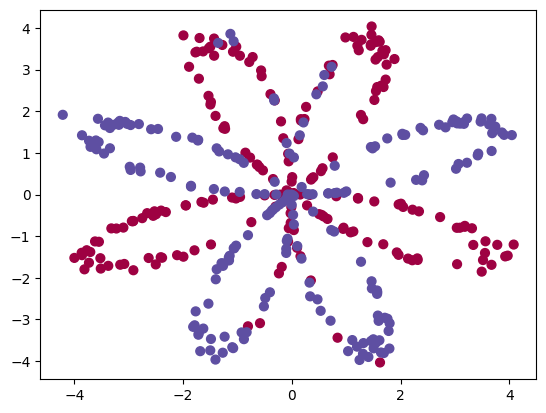

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

# Load dataset
X, Y = load_planar_dataset()

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)


## 🔍 Baseline: Logistic Regression

We train a logistic regression classifier on the data and plot its decision boundary.


c:\Users\samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 %


C:\Users\samad\AppData\Local\Temp\ipykernel_12068\3597189978.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy of logistic regression: %d %%' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / Y.size * 100))


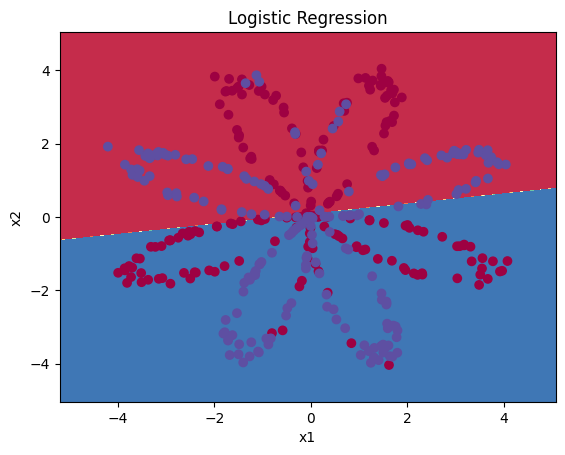

In [2]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: %d %%' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / Y.size * 100))


## 🧠 Define layer sizes

We define the number of units in each layer: input, hidden, and output.


In [3]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

n_x, n_h, n_y = layer_sizes(X, Y)
print(f"n_x = {n_x}, n_h = {n_h}, n_y = {n_y}")


n_x = 2, n_h = 4, n_y = 1


## ⚙️ Initialize parameters

Weights are initialized randomly with small values, and biases are initialized to zero.


In [4]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

parameters = initialize_parameters(n_x, n_h, n_y)
for k, v in parameters.items():
    print(f"{k} =\n{v}")


W1 =
[[ 0.00814343  0.0078047 ]
 [-0.01464054 -0.00154491]
 [-0.00092432 -0.00237875]
 [-0.00755663  0.01851438]]
b1 =
[[0.]
 [0.]
 [0.]
 [0.]]
W2 =
[[ 0.00209097  0.01555016 -0.00569149 -0.01061797]]
b2 =
[[0.]]


## 🔁 Forward propagation

We implement forward propagation to compute the output of the network.


In [5]:
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A2, {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

A2, cache = forward_propagation(X, parameters)
print("A2 =", A2)


A2 = [[0.49979195 0.5000657  0.50005805 0.50008746 0.49984061 0.50014115
  0.49979735 0.50003958 0.49986705 0.49990847 0.49978342 0.50013746
  0.49989145 0.49990629 0.49979319 0.49997986 0.49983117 0.49993274
  0.49978417 0.49977458 0.49991012 0.49981444 0.49978585 0.49978082
  0.4998331  0.49978945 0.49978274 0.49982826 0.49978429 0.49982391
  0.49978287 0.49977357 0.49977146 0.49976182 0.49977722 0.49982777
  0.49979637 0.49987268 0.50013357 0.49996785 0.49984423 0.49978652
  0.49979678 0.50017779 0.49993389 0.49982416 0.49996974 0.50019461
  0.49997187 0.50010374 0.50005492 0.49995227 0.49986911 0.49995647
  0.50001322 0.50015829 0.500155   0.50017902 0.50013546 0.50019455
  0.50000277 0.50019742 0.50017579 0.5001199  0.50018712 0.50014699
  0.50016492 0.500122   0.50003486 0.50002338 0.50001136 0.50014722
  0.50018291 0.50013467 0.50018739 0.49999722 0.50020475 0.50010408
  0.50016672 0.50009253 0.50018993 0.5001816  0.50013973 0.50010066
  0.50012243 0.50012131 0.50018157 0.500073

## 📉 Compute cost

We use cross-entropy loss to measure how well the network performs.


In [6]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return float(np.squeeze(cost))

cost = compute_cost(A2, Y)
print("cost =", cost)


cost = 0.6931125167719424


## 🔄 Backward propagation

We compute the gradients of the cost with respect to the weights and biases using the chain rule.


In [7]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1**2)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

grads = backward_propagation(parameters, cache, X, Y)
for k, v in grads.items():
    print(f"{k} =\n{v}")


dW1 =
[[-4.70690212e-05  4.11157204e-04]
 [-3.50786575e-04  3.06388144e-03]
 [ 1.29089685e-04 -1.11987590e-03]
 [ 2.44225288e-04 -2.07647922e-03]]
db1 =
[[-1.19216713e-08]
 [ 1.39568414e-07]
 [ 1.09077696e-08]
 [-5.48251244e-07]]
dW2 =
[[ 1.35117990e-03  2.73782249e-05 -4.47115222e-04  3.80800948e-03]]
db2 =
[[-1.91436626e-06]]


## 🔧 Update parameters

We update weights and biases using gradient descent.


In [8]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"] - learning_rate * grads["dW1"]
    b1 = parameters["b1"] - learning_rate * grads["db1"]
    W2 = parameters["W2"] - learning_rate * grads["dW2"]
    b2 = parameters["b2"] - learning_rate * grads["db2"]
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

parameters = update_parameters(parameters, grads)


## 🧠 Train the model

We loop through forward/backward propagation and parameter updates to train our neural network.


In [9]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x, n_y = layer_sizes(X, Y)[0], layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
    return parameters


## 🔍 Make predictions

We use the trained model to make predictions on the training set.


In [10]:
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    return (A2 > 0.5).astype(int)

parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)
predictions = predict(parameters, X)
print("Accuracy:", 100 * np.mean(predictions == Y), "%")


Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220677
Cost after iteration 8000: 0.219428
Cost after iteration 9000: 0.218531
Accuracy: 90.5 %


## 🧭 Plot decision boundaries for various hidden layer sizes

We test how different hidden layer sizes affect the decision boundary and accuracy.


Accuracy for 1 hidden units: 67.50 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.50 %
Accuracy for 5 hidden units: 91.25 %


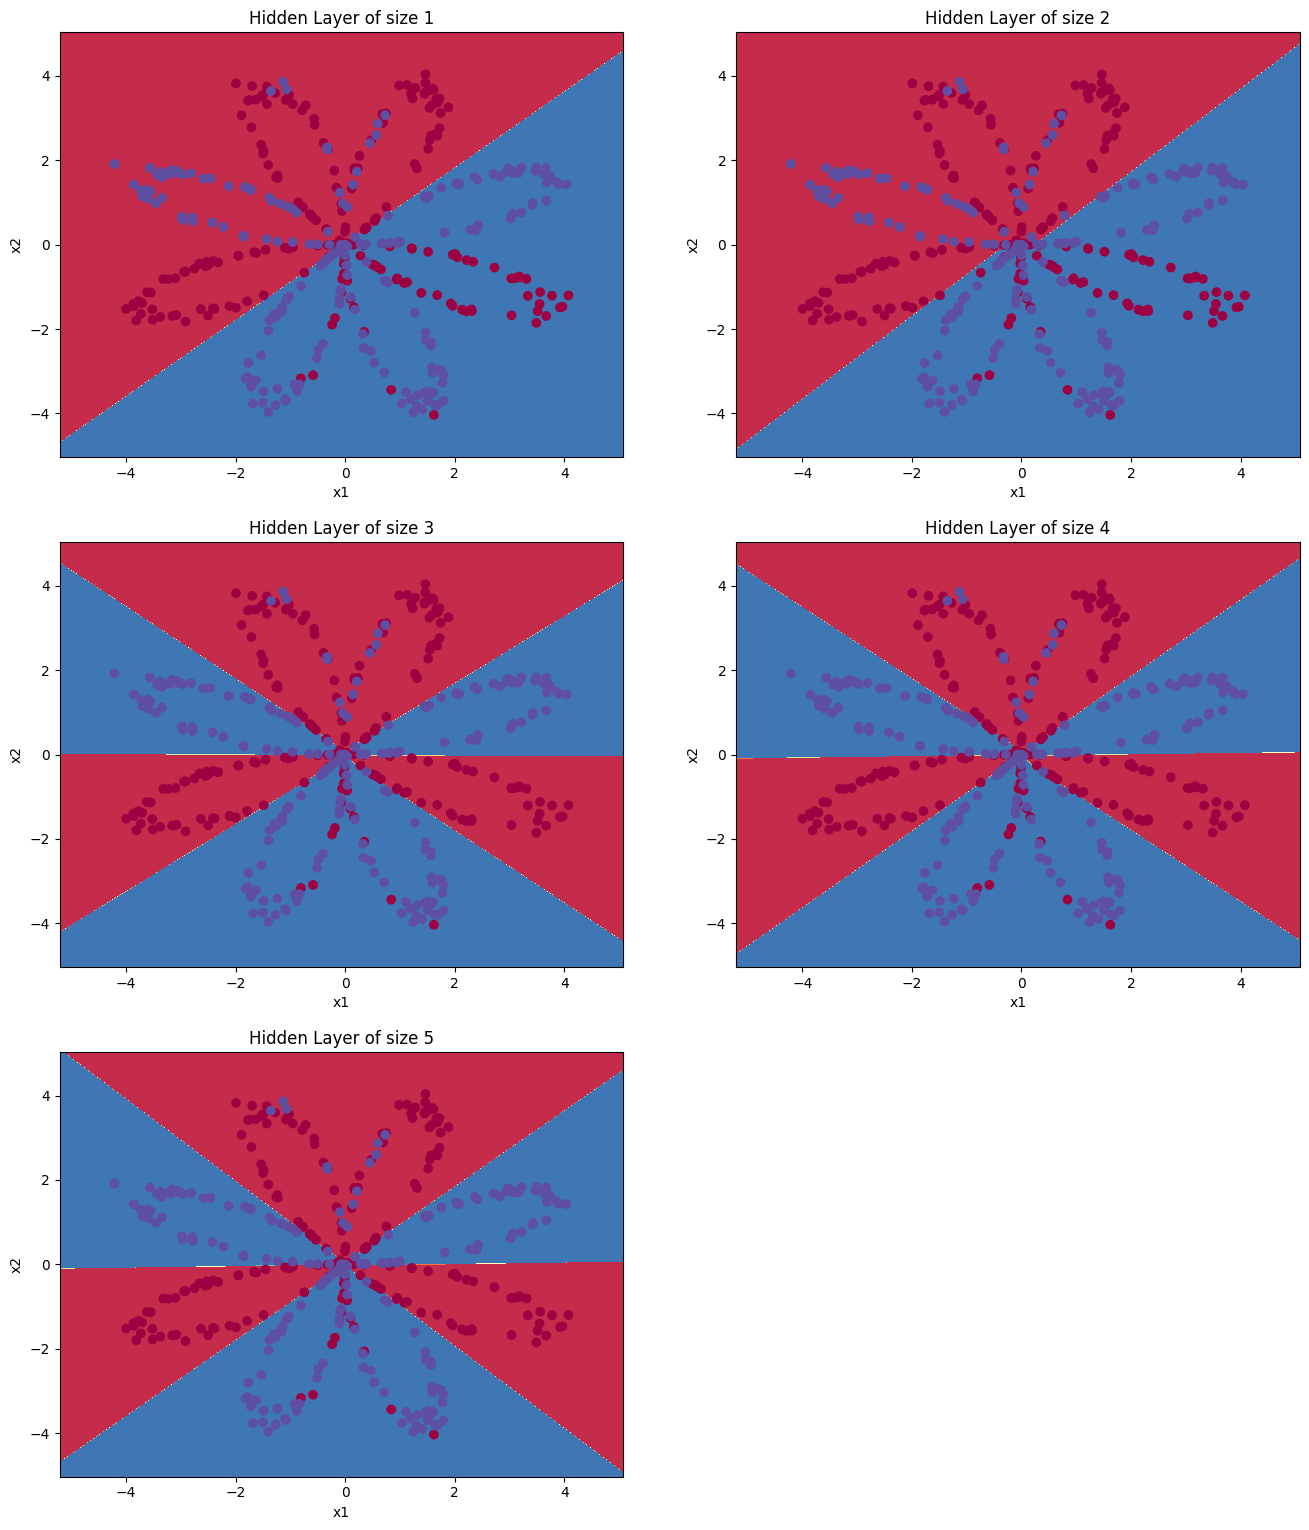

In [11]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title(f"Hidden Layer of size {n_h}")
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    acc = 100 * np.mean(predictions == Y)
    print(f"Accuracy for {n_h} hidden units: {acc:.2f} %")


C:\Users\samad\AppData\Local\Temp\ipykernel_12068\2963959909.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 85.5 %
Accuracy for 2 hidden units: 88.0 %
Accuracy for 3 hidden units: 96.0 %
Accuracy for 4 hidden units: 97.0 %
Accuracy for 5 hidden units: 97.0 %


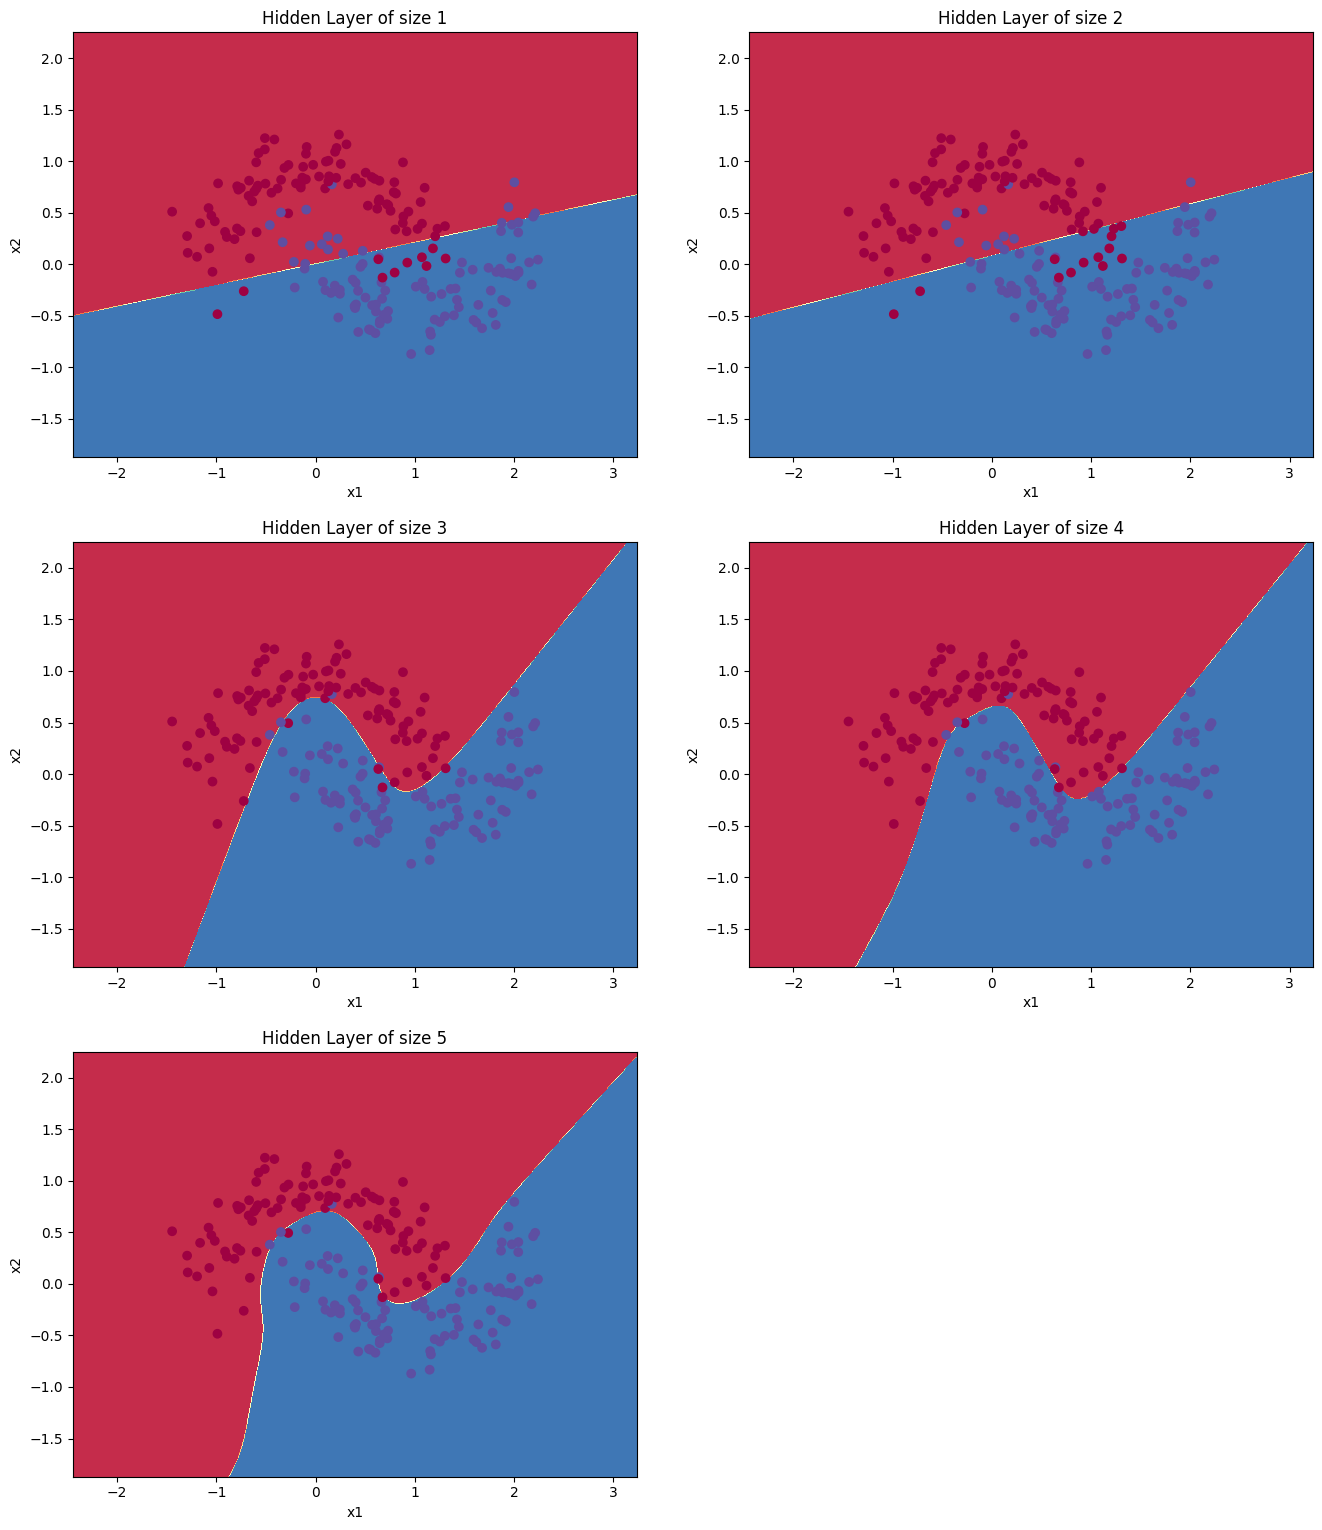

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2
# hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))